<h1>3.1 Linear regression 1D: Training Two Parameter Stochastic Gradient Descent (SGD)</h1>


<h2>Objective</h2><ul><li> How to use SGD(Stochastic Gradient Descent) to train the model.</li></ul> 


<h2>Preparation</h2>


We'll need the following libraries:  


In [1]:
# These are the libraries we are going to use in the lab.

import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [2]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Set random seed: 


In [3]:
# Set random seed

torch.manual_seed(1)

Generate values from <i>-3</i> to <i>3</i> that create a line with a slope of <i>1</i> and a bias of <i>-1</i>. This is the line that you need to estimate. Add some noise to the data:


In [4]:
# Setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

Plot the results:


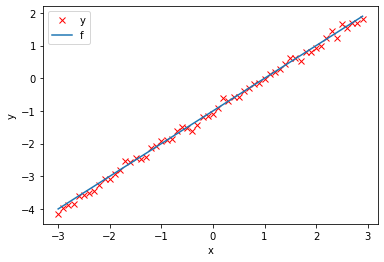

In [5]:
# Plot out the data dots and line

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


Define the <code>forward</code> function:


In [6]:
# Define the forward function

def forward(x):
    return w * x + b

Define the cost or criterion function (MSE): 


In [7]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 432x288 with 0 Axes>

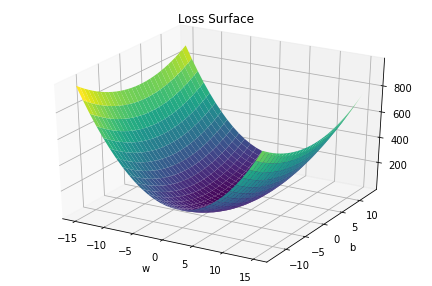

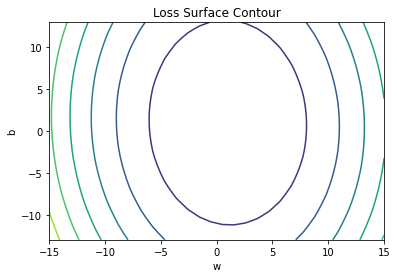

In [8]:
# Create plot_error_surfaces for viewing the data
# plot_error_surfaces(w_range, b_range, X, Y, n_samples)

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

<!--Empty Space for separating topics-->


<h2 id="BGD">Train the Model: Batch Gradient Descent</h2>


Create model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True because the system must learn it.


In [9]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Set the learning rate to  0.1 and create an empty list <code>LOSS</code> for storing the loss for each iteration.


In [10]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

Define <code>train_model</code> function for train the model.


In [11]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 10 epochs of batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


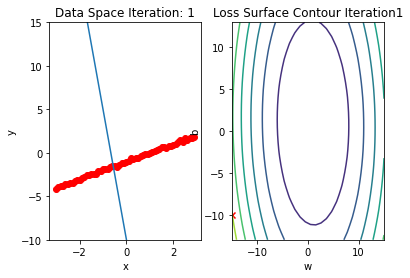

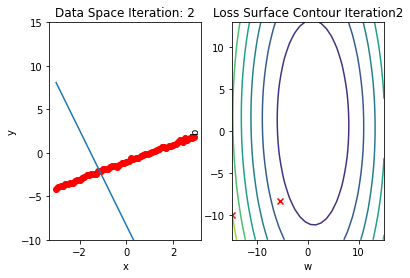

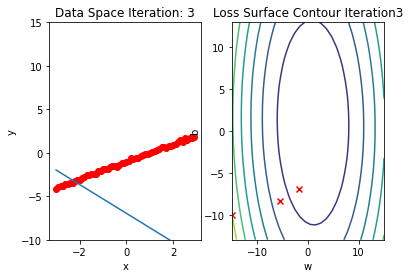

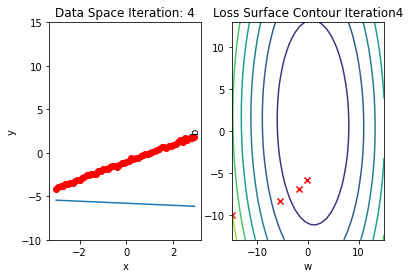

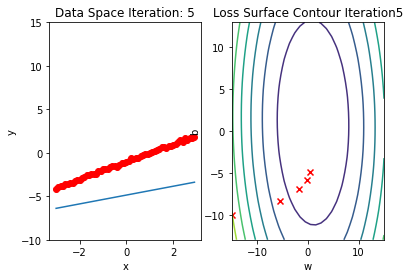

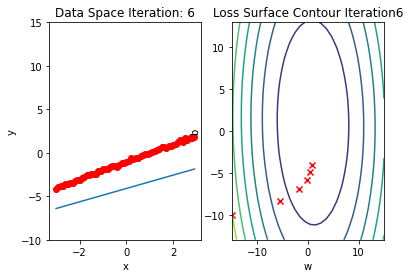

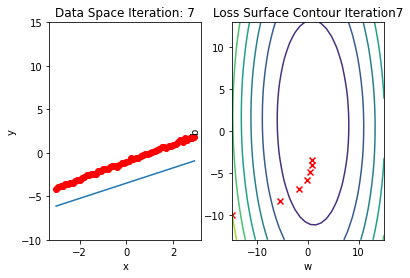

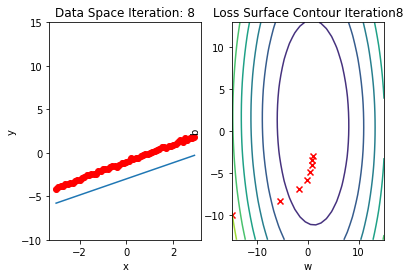

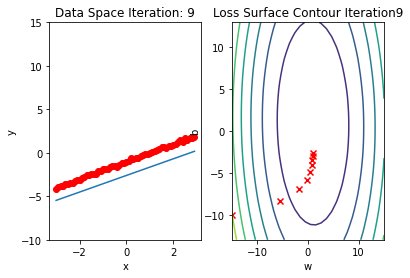

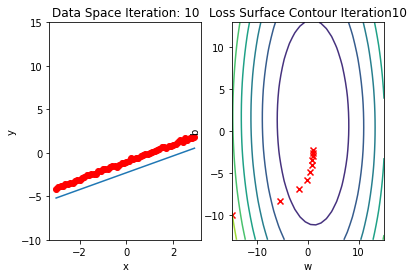

In [12]:
# Train the model with 10 iterations

train_model(10)

<!--Empty Space for separating topics-->


<h2 id="SGD">Train the Model: Stochastic Gradient Descent</h2>


* SGD: mini-batch만큼 움직여서 최적의 파라미터 값을 찾아내는 것

Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [13]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Define <code>train_model_SGD</code> function for training the model.


In [14]:
# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

* Batch Gradient Descent vs Stochastic Gradient Descent

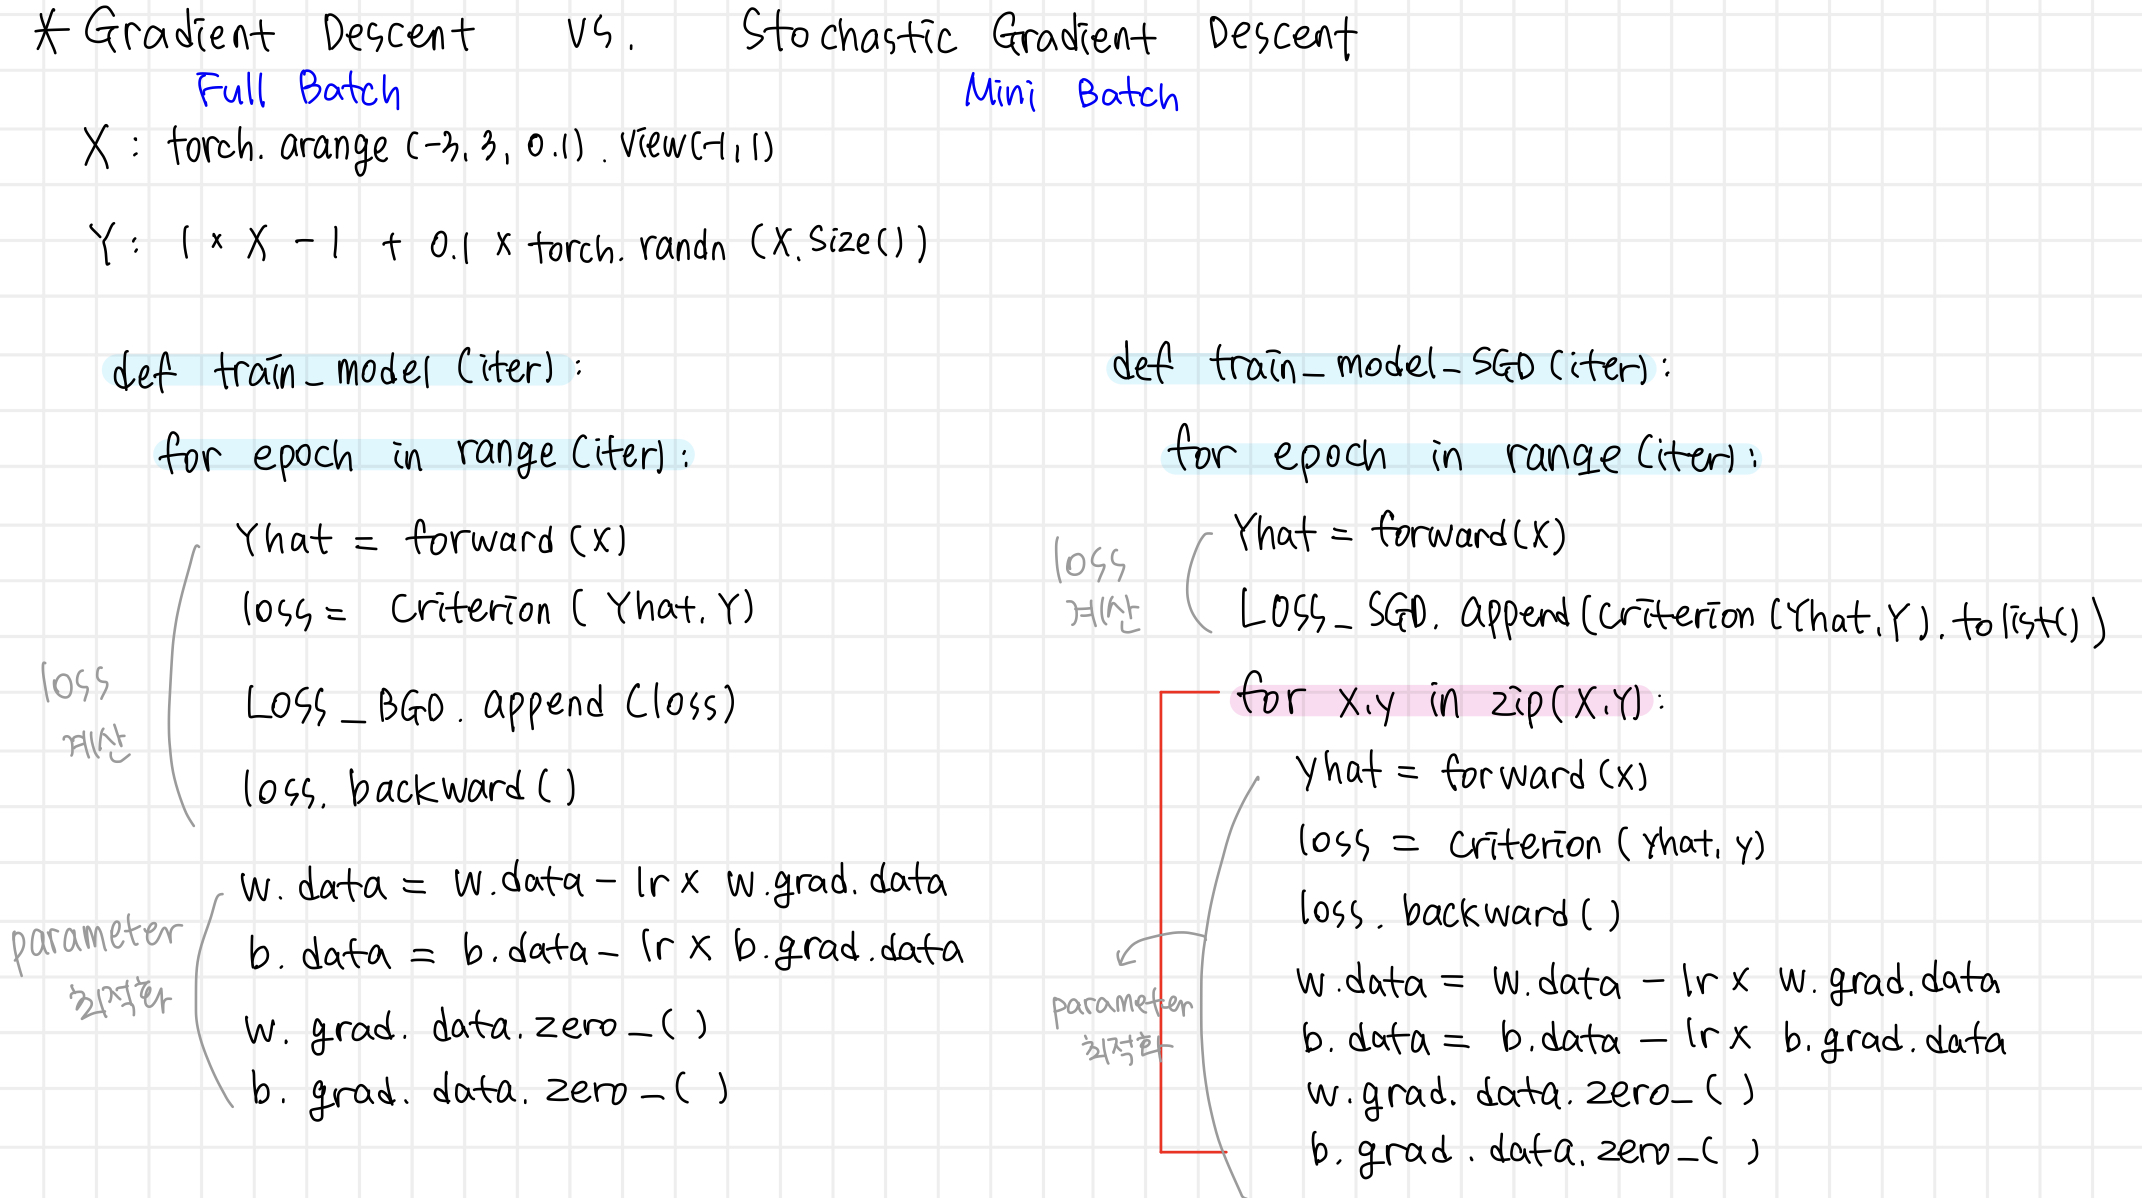

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


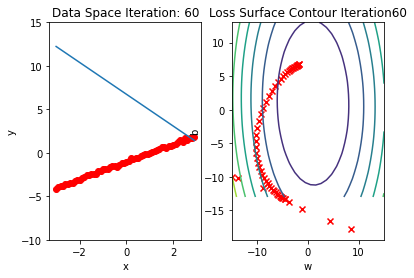

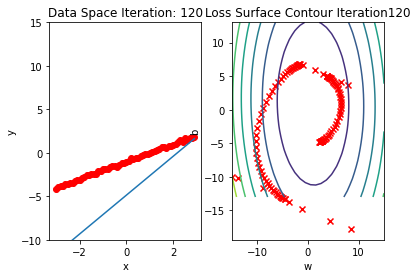

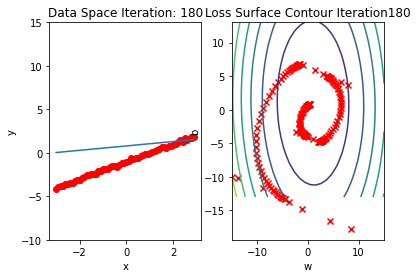

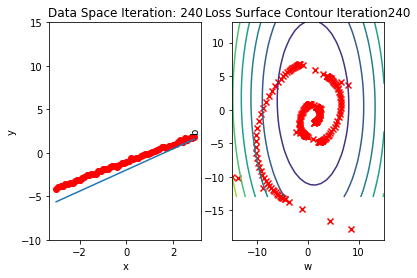

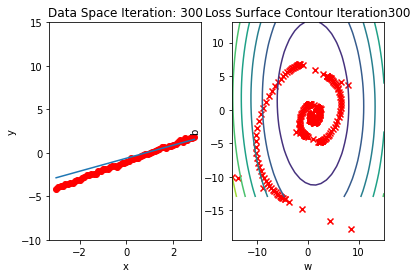

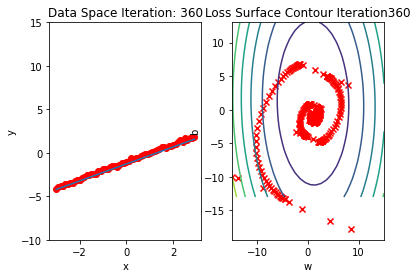

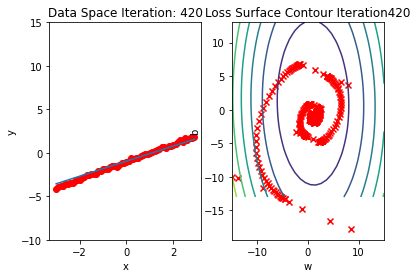

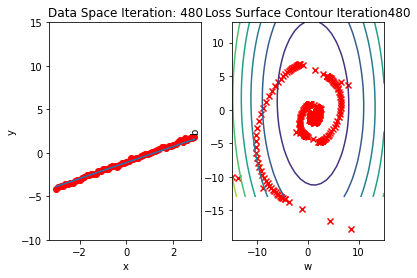

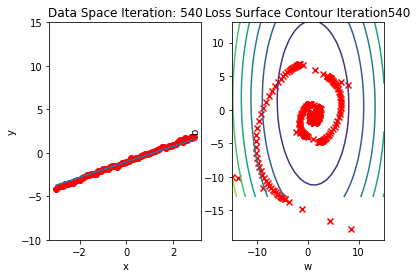

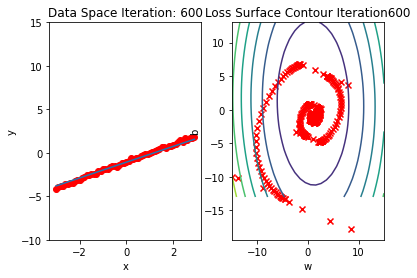

In [ ]:
# Train the model with 10 iterations

train_model_SGD(10)

Compare the loss of both batch gradient descent as SGD.


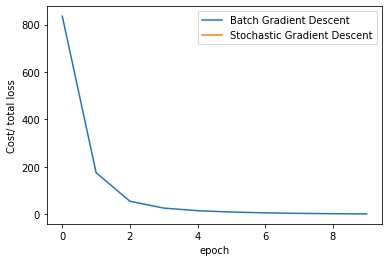

In [15]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="SGD_Loader">SGD with Dataset DataLoader</h2>


Import the module for building a dataset class: 


In [16]:
# Import the library for DataLoader

from torch.utils.data import Dataset, DataLoader

Create a dataset class:


In [17]:
# Dataset Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1) # 데이터 정의
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

Create a dataset object and check the length of the dataset.


In [18]:
# Create the dataset and check the length

dataset = Data()
print("The length of dataset: ", len(dataset))

The length of dataset:  60


Obtain the first training point:  


In [19]:
# Print the first point

x, y = dataset[0]
print("(", x, ", ", y, ")")

( tensor([-3.]) ,  tensor([-4.]) )


Similarly, obtain the first three training points:  


In [20]:
# Print the first 3 point

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [21]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create a <code>DataLoader</code> object by using the constructor: 


In [22]:
# Create DataLoader

trainloader = DataLoader(dataset = dataset, batch_size = 1)

Define <code>train_model_DataLoader</code> function for training the model.


In [23]:
# The function for training the model

w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # Loop
    for epoch in range(epochs):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)
        
        # store the loss 
        LOSS_Loader.append(criterion(Yhat, Y).tolist())
        
        for x, y in trainloader: # zip(X,Y)
            
            # make a prediction
            yhat = forward(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # Backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            
            # Updata parameters slope
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            
            # Clear gradients 
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


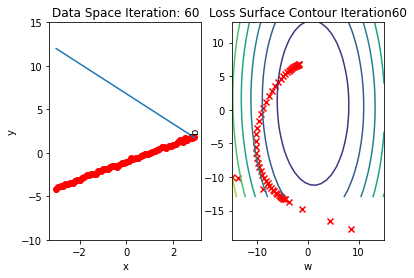

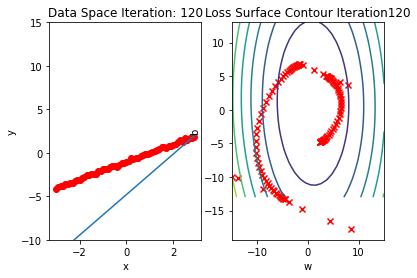

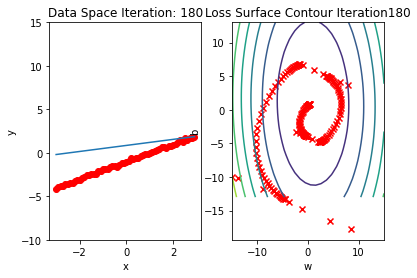

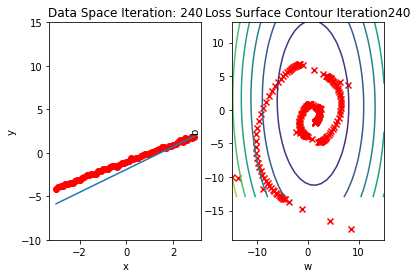

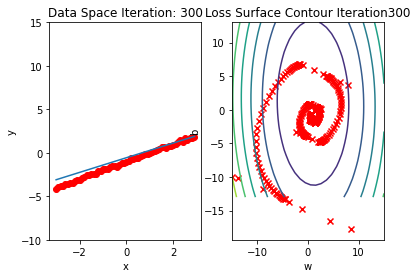

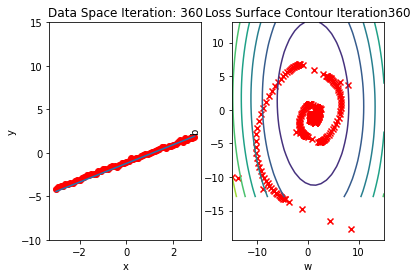

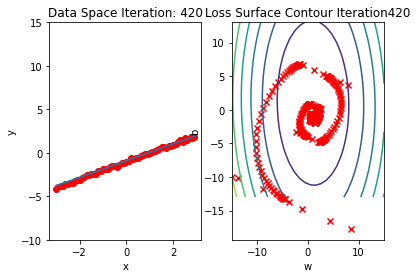

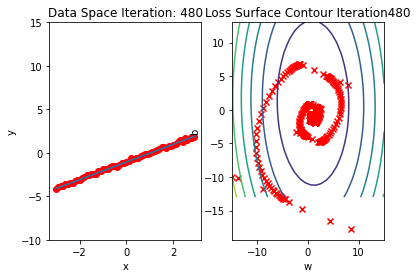

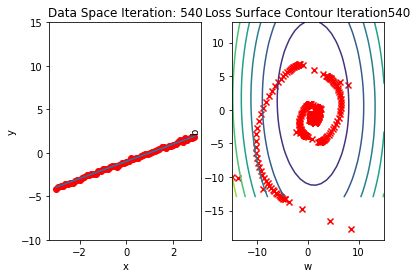

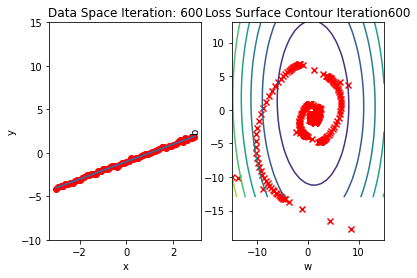

In [24]:
# Run 10 iterations

train_model_DataLoader(10)

Compare the loss of both batch gradient decent as SGD. Note that SGD converges to a minimum faster, that is, it decreases faster. 


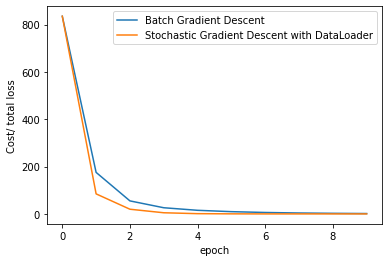

In [25]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<h3>Practice</h3>


For practice, try to use SGD with DataLoader to train model with 10 iterations. Store the total loss in <code>LOSS</code>. We are going to use it in the next question.


In [ ]:
# Practice: Use SGD with trainloader to train model and store the total loss in LOSS

LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)


Double-click <b>here</b> for the solution.

<!-- 
def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS.append(criterion(Yhat, X))
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()
my_train_model(10)
-->


Plot the total loss


In [ ]:
# Practice: Plot the total loss using LOSS


Double-click **here** for the solution.

<!-- 
plt.plot(LOSS,label = "Stochastic Gradient Descent")
plt.xlabel('iteration')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()
-->


<h1>3.2 Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Decent</h1>


<h2>Objective</h2><ul><li> How to use Mini-Batch Gradient Descent to train model.</li></ul> 


<h2 id="Mini5">Mini Batch Gradient Descent: Batch Size Equals 5</h2> 


Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [27]:
# Create a plot_error_surfaces object.

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create <code>Data</code> object and create a <code>Dataloader</code> object where the batch size equals 5:


In [28]:
# Create DataLoader object and Data object

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

Define <code>train_model_Mini5</code> function to train the model.


In [29]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI5 = []
lr = 0.1

def train_model_Mini5(epochs):
    for epoch in range(epochs):
        # calculate loss
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
        
        # update parameters
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

Run 10 epochs of mini-batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


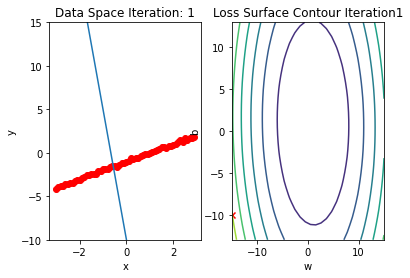

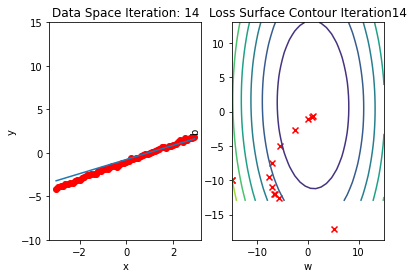

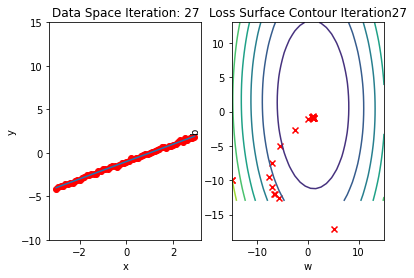

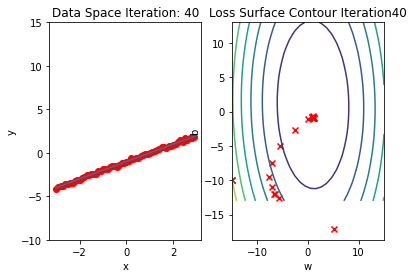

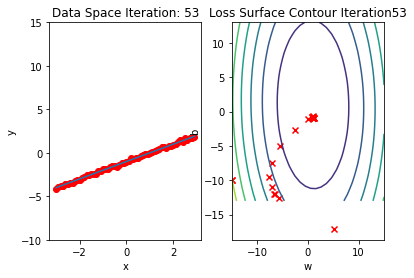

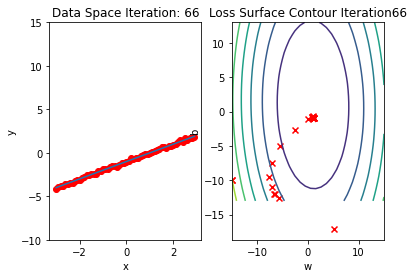

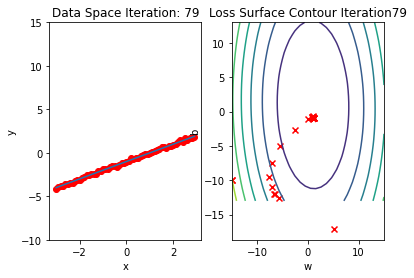

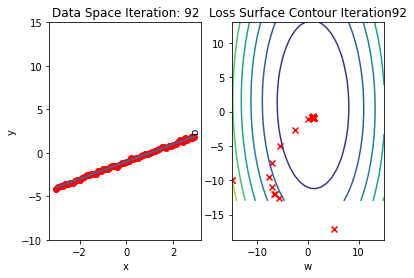

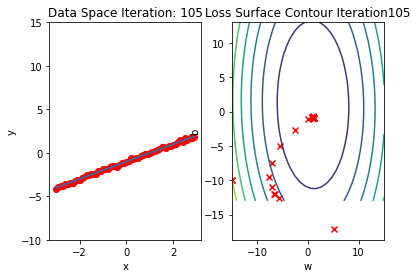

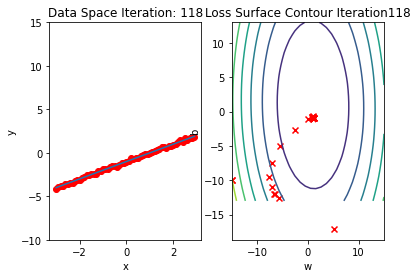

In [30]:
# Run train_model_Mini5 with 10 iterations.

train_model_Mini5(10)

<!--Empty Space for separating topics-->


<h2 id="Mini10">Mini Batch Gradient Descent: Batch Size Equals 10</h2> 


Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [31]:
# Create a plot_error_surfaces object.

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create <code>Data</code> object and create a <code>Dataloader</code> object batch size equals 10


In [32]:
# Create DataLoader object

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

Define <code>train_model_Mini10</code> function for training the model.


In [33]:
# Define train_model_Mini10 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI10 = []
lr = 0.1

def train_model_Mini10(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(X),Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

Run 10 epochs of mini-batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


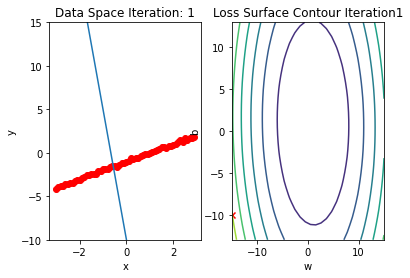

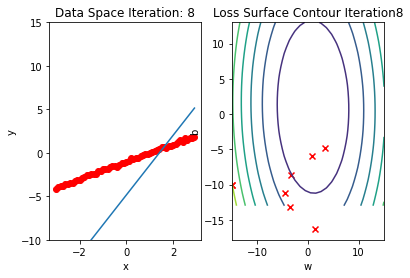

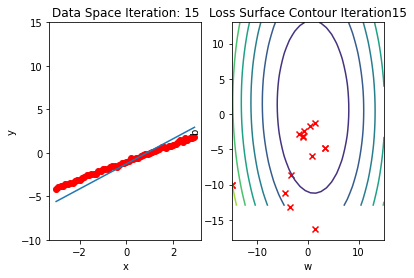

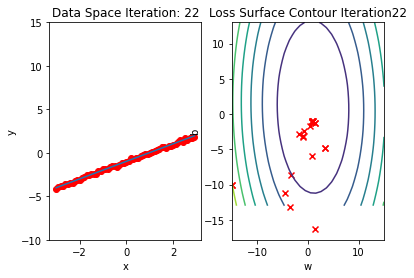

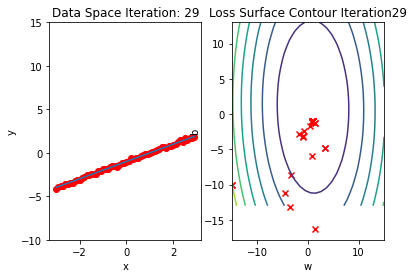

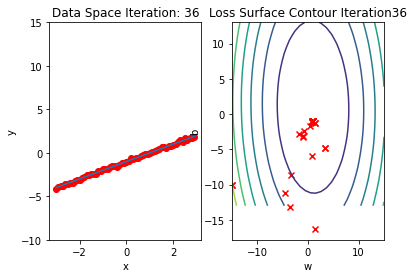

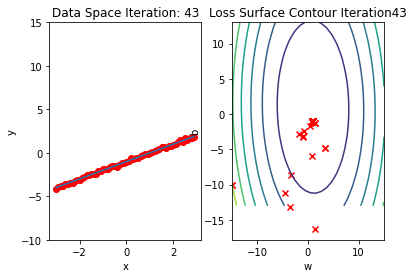

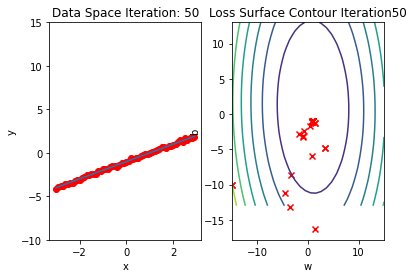

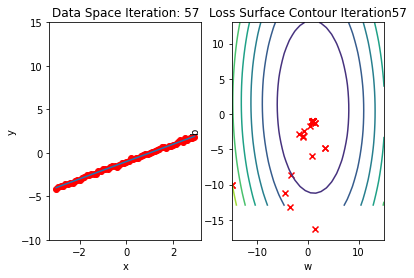

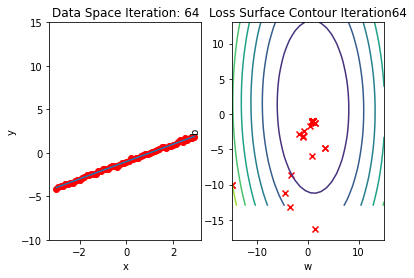

In [34]:
# Run train_model_Mini5 with 10 iterations.

train_model_Mini10(10)

Plot the loss for each epoch:  


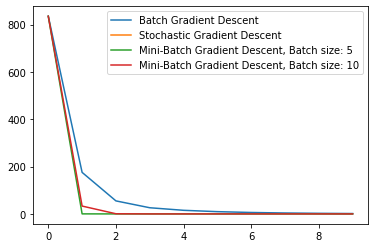

In [35]:
# Plot out the LOSS for each method

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.legend()

<!--Empty Space for separating topics-->


<h3>Practice</h3>


Perform mini batch gradient descent with a batch size of 20. Store the total loss for each epoch in the list LOSS20.  


In [36]:
# Practice: Perform mini batch gradient descent with a batch size of 20.

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI20 = []
lr = 0.1


Double-click <b>here</b> for the solution.

<!-- 
trainloader = DataLoader(dataset = dataset, batch_size = 20)
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

LOSS_MINI20 = []
lr = 0.1

def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI20.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

my_train_model(10)
-->


Plot a graph that shows the LOSS results for all the methods.


In [ ]:
# Practice: Plot a graph to show all the LOSS functions


Double-click <b>here</b> for the solution.

<!-- 
plt.plot(LOSS_BGD, label = "Batch Gradient Descent")
plt.plot(LOSS_SGD, label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5, label = "Mini-Batch Gradient Descent,Batch size:5")
plt.plot(LOSS_MINI10, label = "Mini-Batch Gradient Descent,Batch size:10")
plt.plot(LOSS_MINI20, label = "Mini-Batch Gradient Descent,Batch size:20")
plt.legend()
-->


<h1>3.3 Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Descent </h1> 


<h2>Objective</h2><ul><li> How to use PyTorch build-in functions to create a model.</li></ul> 


<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>


Create a linear regression class 


In [37]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

We will use PyTorch build-in functions to create a criterion function; this calculates the total loss or cost 


In [38]:
# Build in cost function

criterion = nn.MSELoss() # loss식 없이 사용가능

Create a linear regression object and optimizer object, the optimizer object will use the linear regression object.


In [39]:
# Create optimizer

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01) # torch에서 optim import함

In [40]:
list(model.parameters())

[Parameter containing:
 tensor([[0.6325]], requires_grad=True), Parameter containing:
 tensor([0.2583], requires_grad=True)]

Remember to construct an optimizer you have to give it an iterable containing the parameters i.e. provide <code> model.parameters()</code> as an input to the object constructor 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.4model_optmiz.png" width="100" alt="Model Optimizer" />


Similar to the model, the optimizer has a state dictionary:


In [41]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6325]])),
             ('linear.bias', tensor([0.2583]))])

In [42]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.01,
   'momentum': 0,
   'nesterov': False,
   'params': [0, 1],
   'weight_decay': 0}],
 'state': {}}

* lr: learning rate
* momentum: loss가 local minimum에 빠졌을 때 다른 minimum을 찾아줄 수 있도록 돕는 역할. 0.9에서 시작하며 0.95, 0.99로 늘리면서 사용함

Many of the keys correspond to more advanced optimizers.


Create a <code>Dataloader</code> object: 


In [43]:
# Create Dataloader object

trainloader = DataLoader(dataset = dataset, batch_size = 1)

PyTorch randomly initialises your model parameters. If we use those parameters, the result will not be very insightful as convergence will be extremely fast. So we will initialise the parameters such that they will take longer to converge, i.e. look cool  


In [44]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6325]])),
             ('linear.bias', tensor([0.2583]))])

In [45]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

Create a plotting object, not part of PyTroch, just used to help visualize 


In [46]:
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

<!--Empty Space for separating topics-->


<h2 id="BGD">Train the Model</h2>


Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


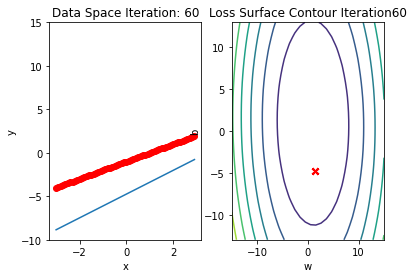

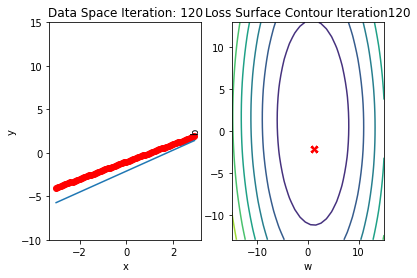

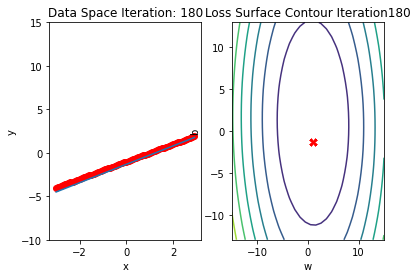

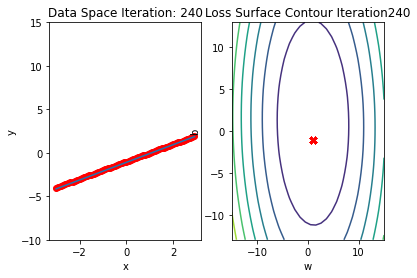

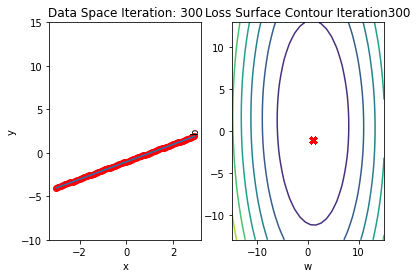

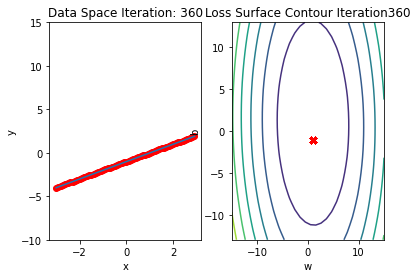

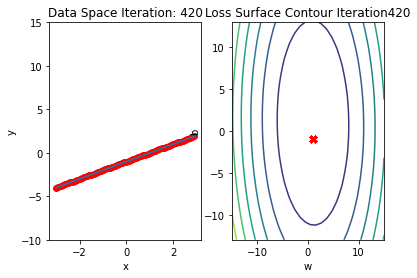

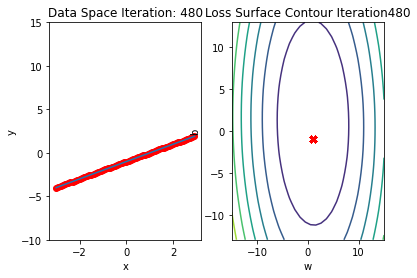

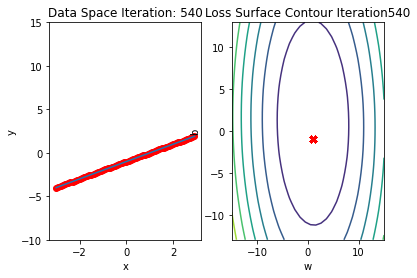

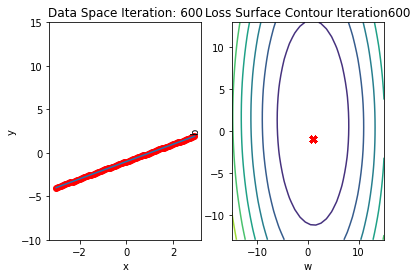

In [47]:
# Train Model

def train_model_SGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x) # linear_regression(1,1)
            loss = criterion(yhat, y) # nn.MSELoss()
            get_surface.set_para_loss(model.state_dict()['linear.weight'][0], model.state_dict()['linear.bias'][0], loss.tolist())          
            optimizer.zero_grad() # gradient 초기화 # pytorch에서는 gradient 값들을 추후에 계속해서 더해주기 때문에 초기화 시켜줘야 함.
            loss.backward()

            optimizer.step() # update parameter # w.data = w.data - lr * w.grad.data
        get_surface.plot_ps()


train_model_SGD(10)

In [48]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.0000]])),
             ('linear.bias', tensor([-1.0001]))])

Let's use the following diagram to help clarify the process. The model takes <code>x</code> to produce an estimate <code>yhat</code>, it will then be compared to the actual <code>y</code>  with the loss function.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.4get_loss.png" width="400" alt="Old Model Cost diagram" />


When we call <code>backward()</code> on the loss function, it will handle the differentiation. Calling the method step on the optimizer object it will update the parameters as they were inputs when we constructed the optimizer object. The connection is shown in the following figure :


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.4update_param.png" width="500" alt="Model Cost with optimizer" />


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to train the model via BGD with <code>lr = 0.1</code>. Use <code>optimizer</code> and the following given variables.


In [ ]:
# Practice: Train the model via SGD using optimizer


Double-click <b>here</b> for the solution.

<!-- 
model = linear_regression(1,1)
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

optimizer = optim.SGD(model.parameters(), lr=0.1)
trainloader = DataLoader(dataset = dataset, batch_size=1)

def my_train_model(iter):
  for epoch in range(iter):
    for x, y in trainloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(model.state_dict()['linear.weight'][0], model.state_dict()['linear.bias'][0], loss.tolist())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    get_surface.plot_ps()

my_train_model(10)
-->


<!--Empty Space for separating topics-->


<h1>3.4 Linear regression: Training and Validation Data</h1> 


<h2>Objective</h2><ul><li> How to use learning rate hyperparameter to improve your model result.  .</li></ul> 


<h2>Preparation</h2>


We'll need the following libraries and set the random seed.


In [49]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.


In [50]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1) # train, test 나눠주지 않고 data 만들어줌
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers. 


In [51]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:


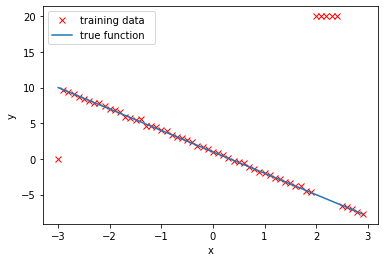

In [52]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="LR_Loader_Cost">Create a Linear Regression Object,  Data Loader, and Criterion Function</h2>


In [53]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create the criterion function and a <code>DataLoader</code> object: 


In [54]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<!--Empty Space for separating topics-->


<h2 id="LR_Hyper">Different learning rates and Data Structures to Store results for different Hyperparameters</h2>


Create a list with different learning rates and a tensor (can be a list) for the training and validating cost/total loss. Include the list MODELS, which stores the training model for every value of the learning rate. 


In [55]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS=[]

<!--Empty Space for separating topics-->


<h2 id="Model">Train different models  for different Hyperparameters</h2>


Try different values of learning rates, perform stochastic gradient descent, and save the results on the training data and validation data. Finally, save each model in a list.


In [56]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

<!--Empty Space for separating topics-->


<h2 id="Result">View the Results</h2>


Plot the training loss and validation loss for each learning rate:  


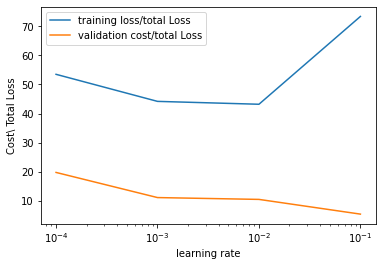

In [57]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Produce a prediction by using the validation data for each model:  


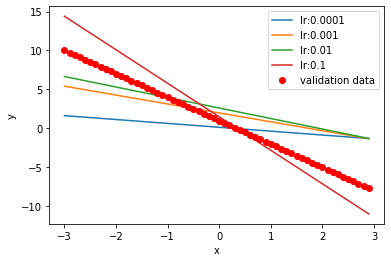

In [58]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    # print('i', yhat.detach().numpy()[0:3])

plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<!--Empty Space for separating topics-->
